<a href="https://colab.research.google.com/github/adarsh-utd/demo-repo/blob/main/respiratory_rate_est.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
from scipy import signal
import pandas as pd

from numpy.fft import fft

In [ ]:
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt



In [ ]:
from numpy import genfromtxt

In [ ]:

data=np.genfromtxt('/content/bidmc_03_Signals.csv',delimiter=',',skip_header=1)
data.view()



array([[0.0000e+00, 2.0626e-01, 1.8866e-01, ..., 5.3033e-01, 4.3966e-01,
        3.7040e+01],
       [8.0000e-03, 2.0821e-01, 2.0137e-01, ..., 5.2544e-01, 4.2980e-01,
        3.7040e+01],
       [1.6000e-02, 2.1017e-01, 2.1994e-01, ..., 5.3523e-01, 4.1995e-01,
        3.7040e+01],
       ...,
       [4.7998e+02, 2.6002e-01, 4.1153e-01, ..., 5.3033e-01, 4.3966e-01,
        1.5059e+01],
       [4.7999e+02, 2.6002e-01, 4.5552e-01, ..., 5.3523e-01, 4.3473e-01,
        1.4746e+01],
       [4.8000e+02, 2.5904e-01, 4.9658e-01, ..., 5.3033e-01, 4.3473e-01,
        1.4433e+01]])

In [ ]:
fs=125
ls=.1
hs=.5
def butter_bandpass(ls,hs,fs,order=5):
  nyq=.5*fs
  low=ls/nyq
  high=hs/nyq
  b,a=butter(order,[low,high],btype='band')
  return b,a
  

In [ ]:
def butter_bandpass_filter(data,ls,hs,fs,order=2):
  b,a=butter_bandpass(ls,hs,fs,order=2)
  x=filtfilt(b,a,data[:,1])
  return x

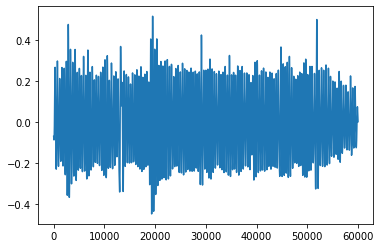

In [ ]:
signal=data
v1=butter_bandpass_filter(signal,ls,hs,fs)
plt.plot(v1)
plt.show()

In [ ]:
import warnings


In [ ]:
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")


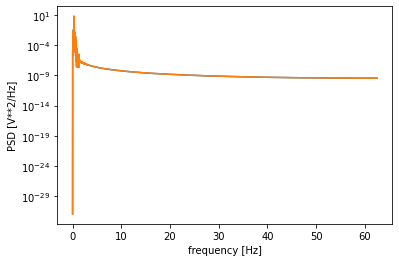

[0.00000000e+00 2.08329861e-03 4.16659722e-03 ... 6.24947918e+01
 6.24968751e+01 6.24989584e+01]
142
0.2958284028599523
17.749704171597138


In [ ]:

f,Pxx_den=signal.periodogram(v1,fs)
plt.semilogy(f, Pxx_den)
plt.plot(f,Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()
print(f)
y=np.argmax(Pxx_den)
print(y)
freq=f[y]
print(freq)
time=1/freq
rr=60/time
print(rr)


   

